# Cluster sampling

This is an arcile on cluster sampling on students.

# Population

In [122]:
L.szkol<-2000
c<-sample(1:8, L.szkol, replace = TRUE, prob = 8:1)
C<-data.frame( 
    Gmina= unlist( lapply (1:L.szkol, FUN = function(x){ rep( sample(1:25,1,replace = FALSE), c[x])   })), # there are 25 unique ID
    Schools = unlist( lapply(1:L.szkol, FUN = function(x){rep(x, c[x])})), # schools have unique ID
    Classes= unlist( lapply( 1:L.szkol, FUN = function(x){1:c[x]} ))
)
C$Students<-abs(round(rnorm(n = dim(C)[1], mean =  21, sd = 5)))+1
C$Points<-abs(rnorm(n = dim(C)[1], mean =  50, sd = 30))
# 5000 szkol
# Losowanie 2 gmin z prawdopo liczby szkol
#aggregate( x = C$klasa, by = list( C$szkola), FUN = length )
G<-aggregate( x = C$Schools, by = list( C$Gmina), FUN = unique )
G$x<- unlist(lapply(G$x, length))
S<-aggregate( x = C$Classes, by = list( C$Schools, C$Gmina), FUN = unique )
S$x<-unlist(lapply(S$x, length))
sum(C$Students)
sum(C$Students*C$Points)/sum( C$Students)

[1] 147341

[1] 51.23692

There are 25 Gminas and 2000 schools.

# Sampling frame
The sample is provided with 3 stage sampling:

* step one - proportional-to-size random sampling Gminas without replacemen;
* step two - simple random sampling without replacement schools
* step three - simple random sampling without replacement classes

# Sampling
## Step one
Gminas - random sampling proportional-to-size without replacement

In [123]:
sample_gminas<-sample( G$Group.1, size = 2, replace = FALSE, prob = G$x)
sample_gminas

[1] 12  5

## Step two
Schools - simple random sampling without replacement 

In [124]:
sample_schools<-sample( S$Group.1[ S$Group.2 %in% sample_gminas[1]] , size = 1, replace = FALSE)
sample_schools[2]<-sample( S$Group.1[ S$Group.2 %in% sample_gminas[2]] , size = 1, replace = FALSE )
sample_schools

[1]  482 1502

## Step three
Classes - random sampling without replacement

In [125]:
sample_classes<-sample( C$Classes [ C$Schools %in% sample_schools[1]] , size = 1, replace = FALSE)
sample_classes[2]<-sample( C$Classes[ C$Schools %in% sample_schools[2]] , size = 1, replace = FALSE )
sample_classes

[1] 1 4

# Estimation - first attempt 



In [126]:
sample_full<-data.frame( gminas=sample_gminas, schools=sample_schools, classes=sample_classes)
results<-lapply( 
    1:dim(sample_full)[1], 
    FUN= function(x){
        C[ C$Gmina == sample_full$gminas[x] &  C$Schools == sample_full$schools[x] & C$Classes == sample_full$classes[x],]
    }      
)        
results<-do.call( rbind, results)
sum(results$Students*results$Points)/sum( results$Students)

[1] 47.4959

# Symulation 
Symulation of the results for the sample frame.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
  0.00679  35.36000  51.04000  51.55000  67.14000 139.80000       104 

[1] 539.4887

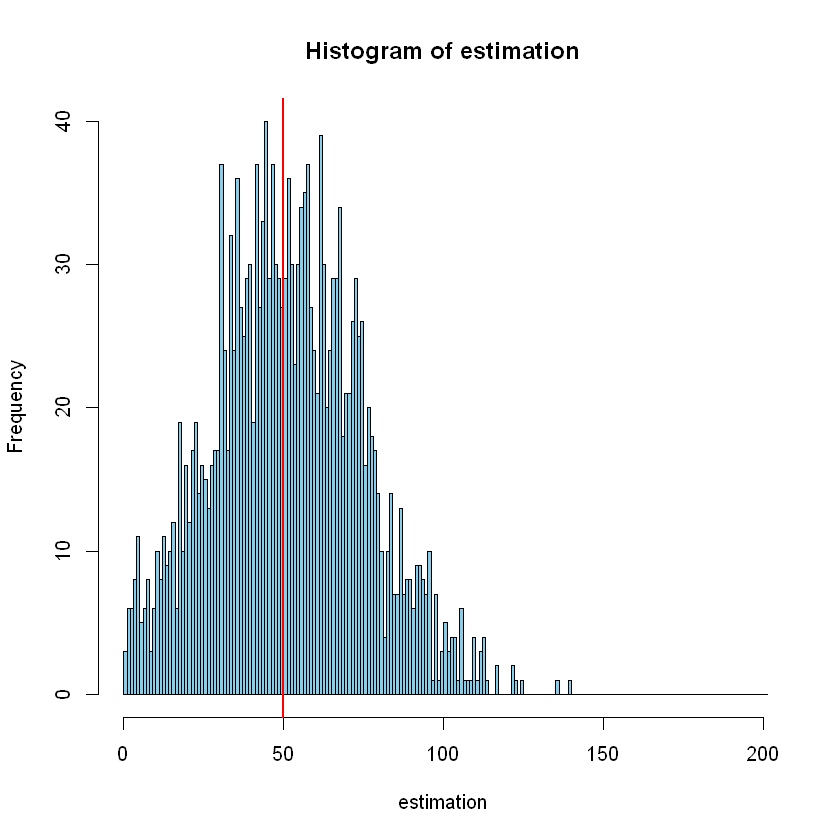

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
  0.00493  33.75000  50.21000  51.82000  67.85000 164.50000       104 

[1] 652.1883

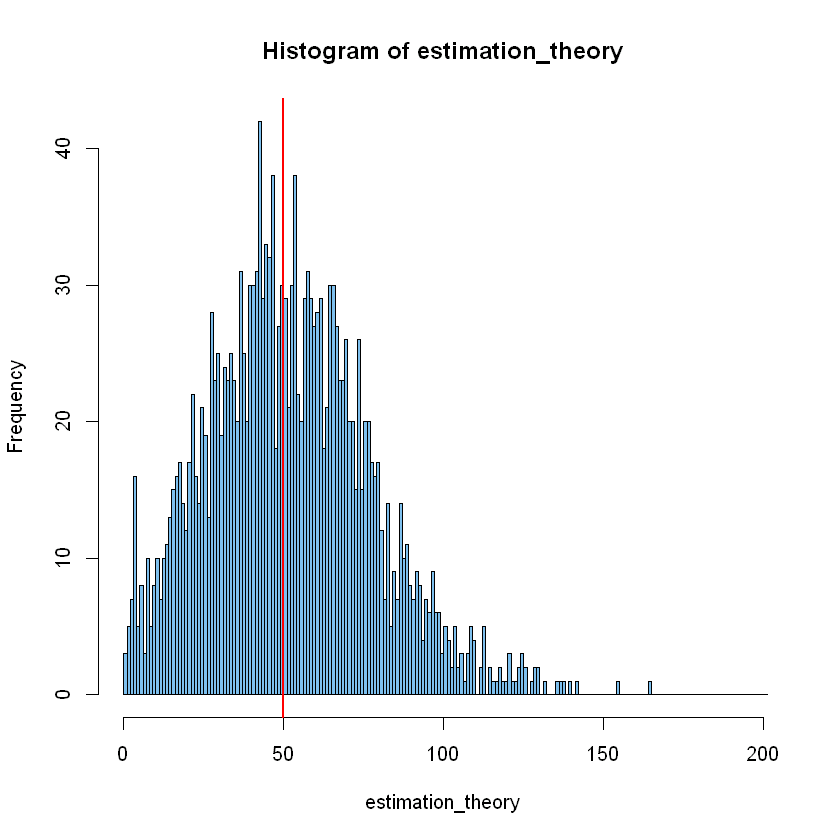

In [136]:
estimation<-c()
estimation_theory<-c()
for (i in 1:2000){
    sample_gminas<-sample( G$Group.1, size = 2, replace = FALSE, prob = G$x)
    sample_schools<-unlist(lapply(sample_gminas,FUN=function(x){sample( S$Group.1[S$Group.2 %in% x ],size = 1,replace = FALSE)}))
    sample_classes<-unlist( lapply(sample_classes, FUN = function(x){sample_classes<-sample(C$Classes[ C$Schools %in% x],size = 1,replace = FALSE)}))
    sample_full<-data.frame( gminas=sample_gminas, schools=sample_schools, classes=sample_classes)
    results<-lapply( 
        1:dim(sample_full)[1], 
        FUN= function(x){
            C[ C$Gmina == sample_full$gminas[x] &  C$Schools == sample_full$schools[x] & C$Classes == sample_full$classes[x],]
        }      
    ) 
    results<-do.call( rbind, results)
    estimation[i]<-sum(results$Students*results$Points)/sum( results$Students)
    estimation_theory[i]<-sum(results$Students*results$Points)*dim(C)[1]/(dim(results)[1]*sum(C$Students))
}
hist( estimation, breaks = 0:201, col="skyblue", xlim = c(0,200))
abline(v=50, col="red", lwd=2)
summary(estimation )
var(estimation, na.rm = TRUE)
hist( estimation_theory, breaks = 0:201, col="skyblue2", xlim = c(0,200))
abline(v=50, col="red", lwd=2)
summary(estimation_theory )
var(estimation_theory, na.rm = TRUE)